<a href="https://colab.research.google.com/github/het1752/Deep-Learning/blob/main/Wine_Type_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/winequalityN.csv')
data.sample(8)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1717,white,6.8,0.27,0.32,1.50,0.044,19.0,142.0,0.99210,3.10,0.43,9.9,6
5437,red,11.2,0.50,0.74,5.15,0.100,5.0,17.0,0.99960,3.22,0.62,11.2,5
3519,white,6.9,0.33,0.62,7.50,0.038,46.0,132.0,0.99143,3.23,0.43,13.4,7
1047,white,7.0,0.31,0.52,1.70,0.029,5.0,61.0,0.99180,3.07,0.43,10.4,5
1352,white,5.7,0.21,0.24,2.30,0.047,60.0,189.0,0.99500,3.65,0.72,10.1,6
676,white,5.9,0.29,0.25,12.00,0.057,48.0,224.0,0.99810,3.23,0.41,9.0,6
1851,white,6.1,0.34,0.46,4.70,0.029,21.0,94.0,0.99100,3.29,0.62,12.3,6
5185,red,7.5,0.40,0.12,3.00,0.092,29.0,53.0,0.99670,3.37,0.70,10.3,6


In [3]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
data.fillna(data['fixed acidity'].median(), inplace = True)
data.fillna(data['volatile acidity'].median(), inplace = True)
data.fillna(data['citric acid'].median(), inplace = True)
data.fillna(data['residual sugar'].median(), inplace = True)
data.fillna(data['pH'].median(), inplace = True)
data.fillna(data['sulphates'].median(), inplace = True)

In [8]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


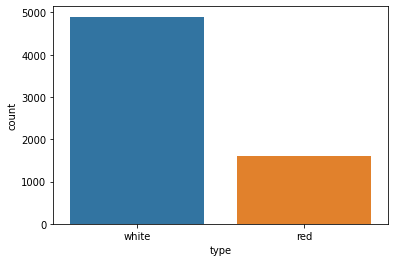

In [9]:
sns.countplot(data['type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


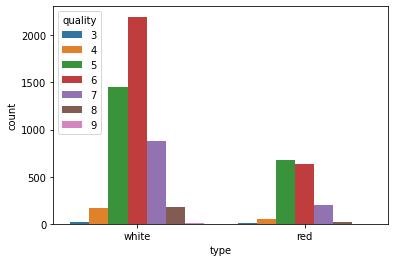

In [11]:
sns.countplot(data['type'],hue=data['quality'])

In [12]:
print(data['type'].unique())
print(data['type'].value_counts())
data['type'].replace(['white','red'],[1,0],inplace=True)

['white' 'red']
white    4898
red      1599
Name: type, dtype: int64


In [13]:
data.sample(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2656,1,7.1,0.23,0.24,5.4,0.039,60.0,196.0,0.9948,3.19,0.78,10.0,4
5510,0,7.5,0.64,0.00,2.4,0.077,18.0,29.0,0.9965,3.32,0.60,10.0,6
1476,1,7.1,0.85,0.49,8.7,0.028,40.0,184.0,0.9962,3.22,0.36,10.7,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f839d406df0>,
      dtype=object)

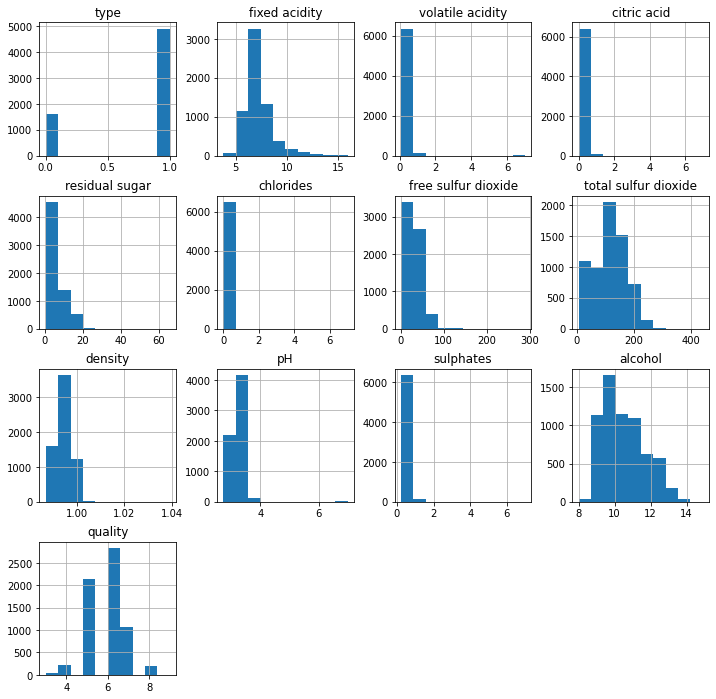

In [14]:
data.hist(figsize=(12,12))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

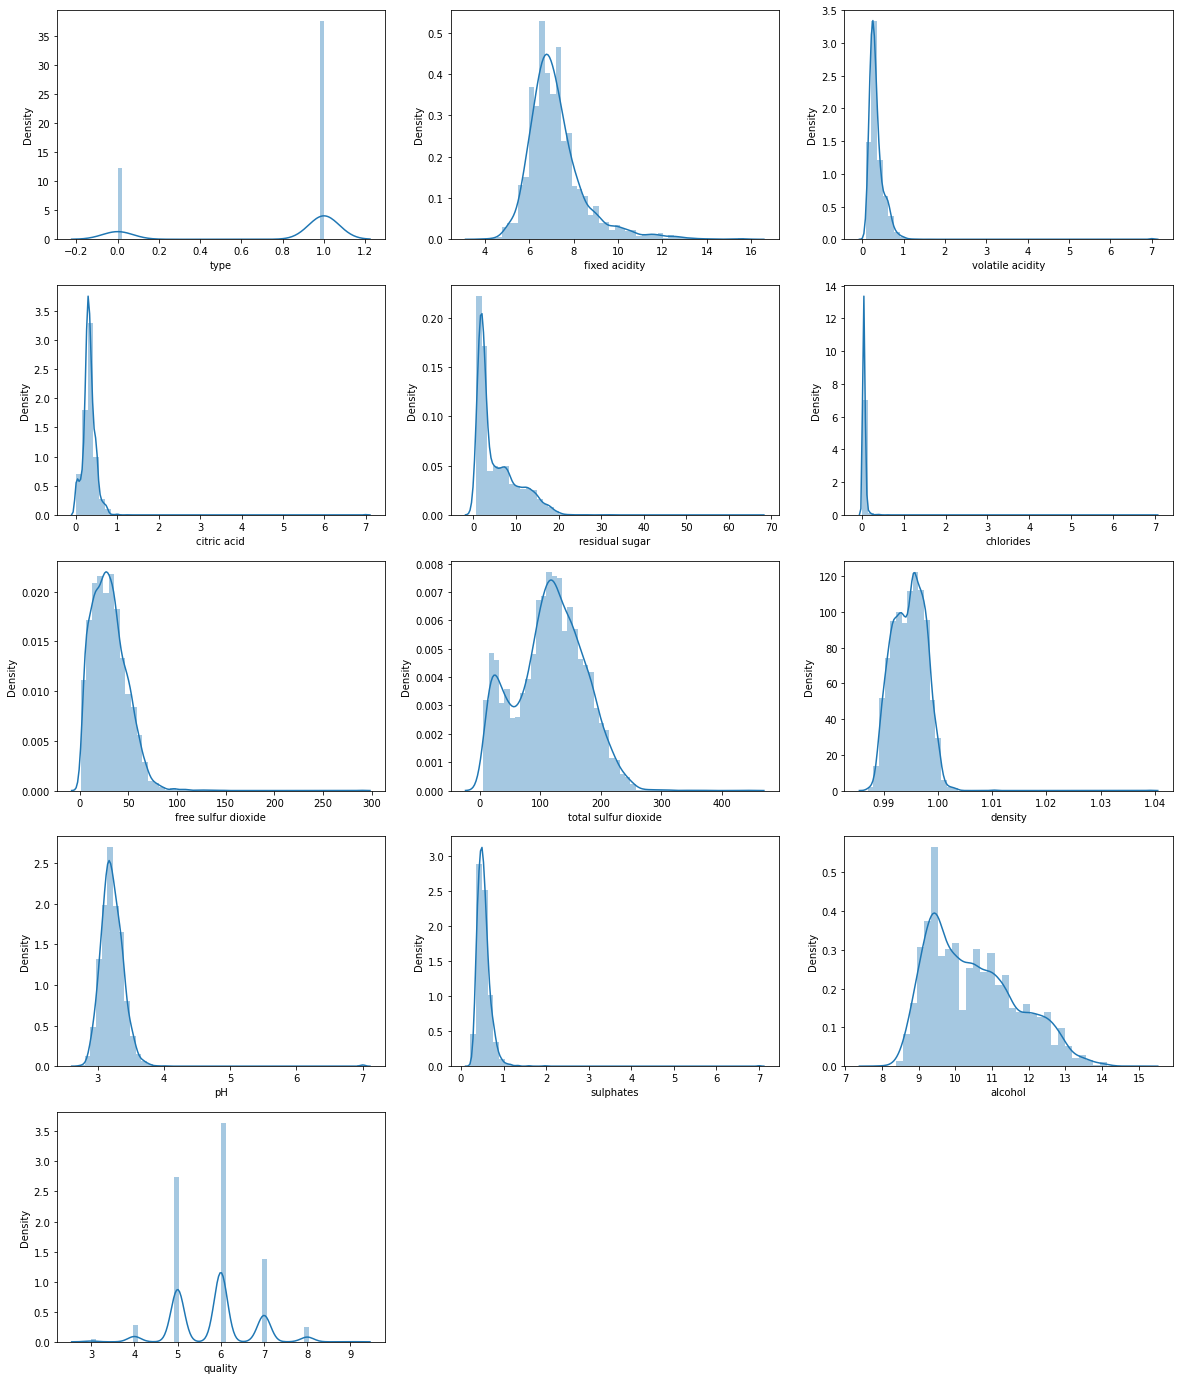

In [15]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in data:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

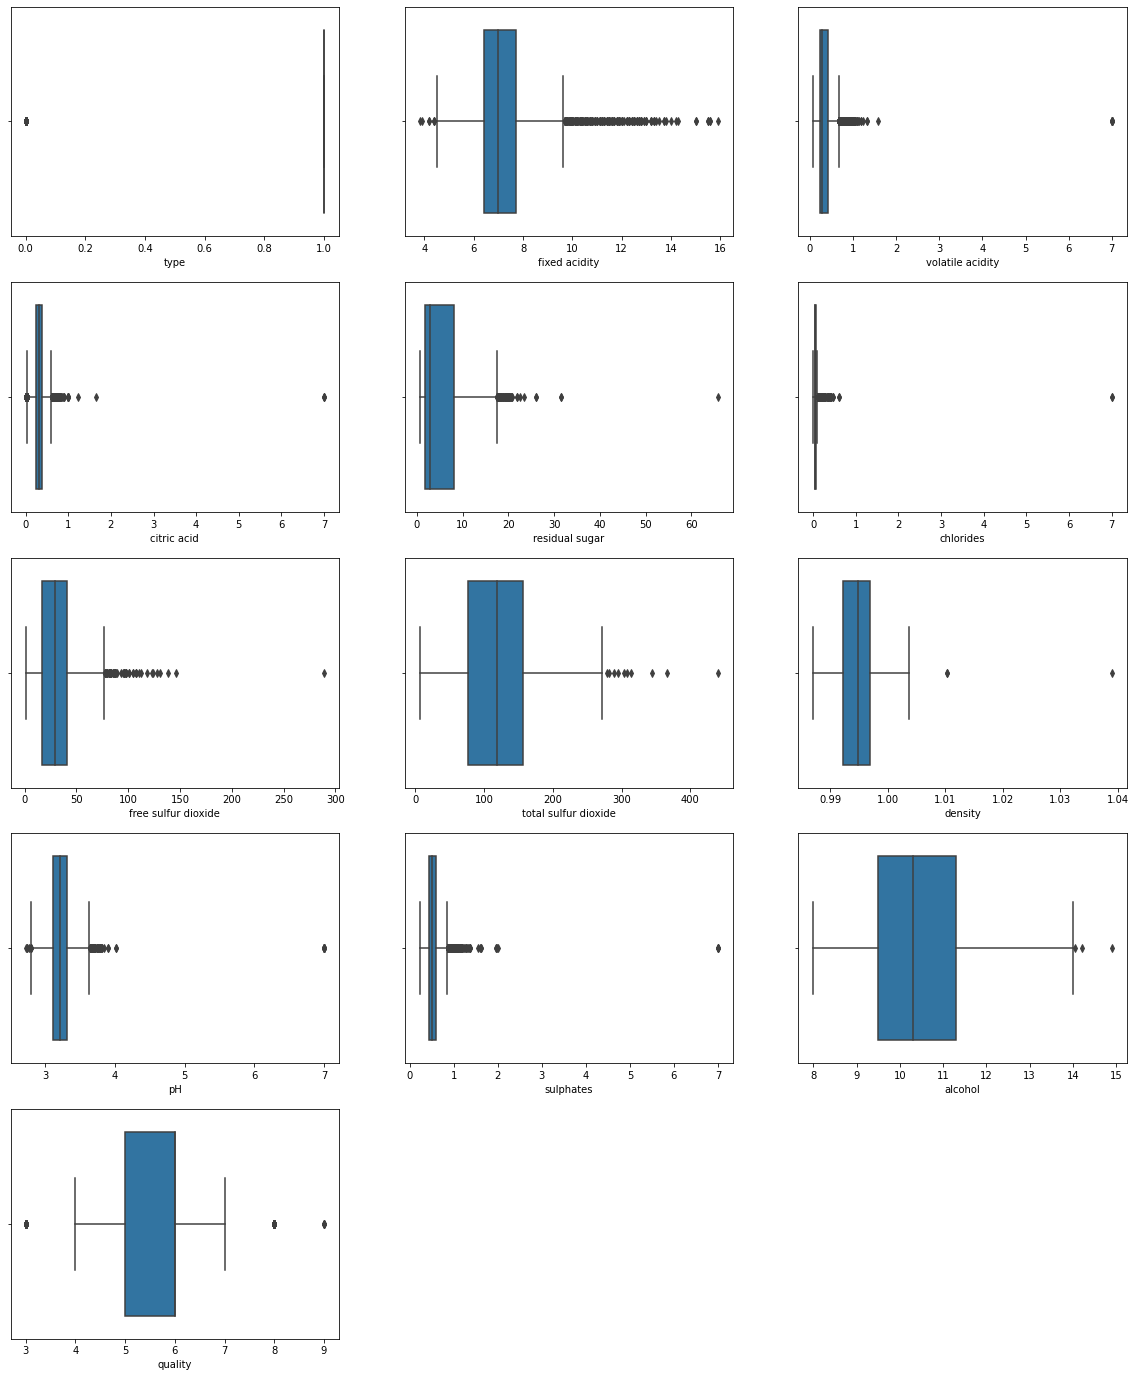

In [16]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in data:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [17]:
x=data.drop(['type'],axis=1)
y=data['type']
x.shape,y.shape

((6497, 12), (6497,))

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(len(x_train),len(y_train),len(x_test),len(y_test))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

5197 5197 1300 1300
(5197, 12) (1300, 12) (5197,) (1300,)


In [19]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
import tensorflow as tf

In [21]:
model=Sequential()
model.add(tf.keras.layers.Dense(16,input_dim=(12),activation="relu"))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(BatchNormalization())
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                208       
                                                                 
 batch_normalization_4 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 10)                170       
                                                                 
 batch_normalization_5 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 batch_normalization_6 (Batc  (None, 10)              

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=50)

Epoch 1/50
260/260 [==============================] - 3s 5ms/step - loss: 0.3618 - accuracy: 0.8753 - val_loss: 0.2595 - val_accuracy: 0.9269
Epoch 2/50
260/260 [==============================] - 1s 4ms/step - loss: 0.2325 - accuracy: 0.9261 - val_loss: 0.3178 - val_accuracy: 0.8800
Epoch 3/50
260/260 [==============================] - 1s 4ms/step - loss: 0.1932 - accuracy: 0.9369 - val_loss: 0.1769 - val_accuracy: 0.9331
Epoch 4/50
260/260 [==============================] - 1s 4ms/step - loss: 0.1604 - accuracy: 0.9452 - val_loss: 0.1797 - val_accuracy: 0.9362
Epoch 5/50
260/260 [==============================] - 1s 4ms/step - loss: 0.1299 - accuracy: 0.9573 - val_loss: 0.1835 - val_accuracy: 0.9462
Epoch 6/50
260/260 [==============================] - 1s 4ms/step - loss: 0.1034 - accuracy: 0.9657 - val_loss: 0.1372 - val_accuracy: 0.9585
Epoch 7/50
260/260 [==============================] - 1s 4ms/step - loss: 0.1018 - accuracy: 0.9673 - val_loss: 0.0881 - val_accuracy: 0.9685
Epoch 

In [24]:
y_pred=model.predict(x_test)
print(y_pred)
print(type(y_pred))

41/41 [==============================] - 0s 2ms/step
[[9.9658608e-01]
 [9.5212340e-01]
 [9.9955511e-01]
 ...
 [3.0556734e-04]
 [1.1440052e-03]
 [4.7995101e-04]]
<class 'numpy.ndarray'>


In [25]:
y_pred=list(y_pred)
y_pred

[array([0.9965861], dtype=float32),
 array([0.9521234], dtype=float32),
 array([0.9995551], dtype=float32),
 array([0.9962971], dtype=float32),
 array([0.99993134], dtype=float32),
 array([0.999736], dtype=float32),
 array([0.99847025], dtype=float32),
 array([0.00106361], dtype=float32),
 array([0.9994142], dtype=float32),
 array([0.00058322], dtype=float32),
 array([0.9999499], dtype=float32),
 array([0.9999322], dtype=float32),
 array([0.00036638], dtype=float32),
 array([0.99997854], dtype=float32),
 array([0.99695706], dtype=float32),
 array([0.9988147], dtype=float32),
 array([0.9991707], dtype=float32),
 array([0.9968261], dtype=float32),
 array([0.9998378], dtype=float32),
 array([0.999983], dtype=float32),
 array([0.9962356], dtype=float32),
 array([0.984046], dtype=float32),
 array([0.9743813], dtype=float32),
 array([0.00080089], dtype=float32),
 array([0.99192476], dtype=float32),
 array([0.99982226], dtype=float32),
 array([0.9999051], dtype=float32),
 array([0.9998933], d

In [26]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [27]:
model.evaluate(x_test,y_test)

41/41 [==============================] - 0s 2ms/step - loss: 0.1088 - accuracy: 0.9677


[0.10875335335731506, 0.9676923155784607]

In [28]:
history.history

{'loss': [0.3618445098400116,
  0.23246027529239655,
  0.1931552290916443,
  0.16037486493587494,
  0.1298781782388687,
  0.10336718708276749,
  0.10175269097089767,
  0.09077423065900803,
  0.08682865649461746,
  0.09928447008132935,
  0.08739669620990753,
  0.08898816257715225,
  0.08728264272212982,
  0.0782499685883522,
  0.07905535399913788,
  0.07657924294471741,
  0.08766987174749374,
  0.08970125019550323,
  0.07427838444709778,
  0.07953699678182602,
  0.0894511342048645,
  0.07422835379838943,
  0.06572659313678741,
  0.07110010832548141,
  0.0671234130859375,
  0.06317262351512909,
  0.06498053669929504,
  0.07964498549699783,
  0.06521868705749512,
  0.07583710551261902,
  0.07451671361923218,
  0.06991402059793472,
  0.06393571197986603,
  0.0672527402639389,
  0.06663454324007034,
  0.06840232014656067,
  0.07245852053165436,
  0.07128961384296417,
  0.057557474821805954,
  0.06708632409572601,
  0.06061854586005211,
  0.06817364692687988,
  0.06119971722364426,
  0.05732

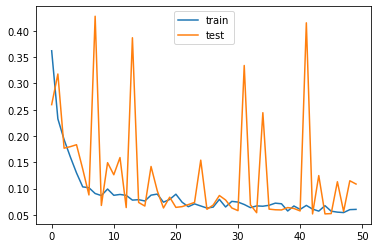

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=["White", "Red"]))

[[277  37]
 [  5 981]]
              precision    recall  f1-score   support

       White       0.98      0.88      0.93       314
         Red       0.96      0.99      0.98       986

    accuracy                           0.97      1300
   macro avg       0.97      0.94      0.95      1300
weighted avg       0.97      0.97      0.97      1300

